Copyright 2020 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

This file incorporates work covered by the following copyright and  
permission notice:  

MIT License

Copyright (c) 2016-2019 Udacity, Inc.

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import collections
import csv
from datetime import datetime
import functools
import math
import os
import pickle
from typing import Callable, Dict, Tuple

import numpy as np
import pandas as pd
from sklearn import utils
import tensorflow as tf
import tqdm

In [2]:
print(tf.__version__)

1.3.0


In [3]:
tf.set_random_seed(42)

---
## Step 0: Load The Data

In [4]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data
data_dir = '../data'
training_file = os.path.join(data_dir, 'train.p')
validation_file= os.path.join(data_dir, 'valid.p')
testing_file = os.path.join(data_dir, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_raw, y_train_raw = train['features'], train['labels']
X_valid_raw, y_valid_raw = valid['features'], valid['labels']
X_test_raw, y_test_raw = test['features'], test['labels']

In [5]:
# Check datasets
for X, y in zip([X_train_raw, X_valid_raw, X_test_raw], [y_train_raw, y_valid_raw, y_test_raw]):
    print(X.shape, X.dtype, y.shape, y.dtype)

(34799, 32, 32, 3) uint8 (34799,) uint8
(4410, 32, 32, 3) uint8 (4410,) uint8
(12630, 32, 32, 3) uint8 (12630,) uint8


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train_raw.shape[0]

# TODO: Number of validation examples
n_validation = X_valid_raw.shape[0]

# TODO: Number of testing examples.
n_test = X_test_raw.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_raw.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train_raw))

print("Number of training examples =", n_train)
print("Numver of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Numver of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [8]:
def gen_sign_name_lookup(csv_file):
    lookup = {}
    with open(csv_file) as f:
        reader = csv.reader(f, delimiter=',')
        # Skip header
        _ = next(reader)
        for class_id, sign_name in reader:
            lookup[int(class_id)] = sign_name
    return lookup

In [9]:
sign_name_file = './signnames.csv'
lookup = gen_sign_name_lookup(sign_name_file)

In [10]:
# Vectorized lookup function
lookup_fn = np.vectorize(lambda x: f'{lookup[x]} [{x}]')

#### Explore labels

##### Get label distribution

In [11]:
def get_label_distribution(label_data):
    class_ids, counts = np.unique(label_data, return_counts=True)
    return (
        pd.DataFrame(data=counts, index=class_ids, columns=['count'])
        .sort_values(by='count', ascending=False))

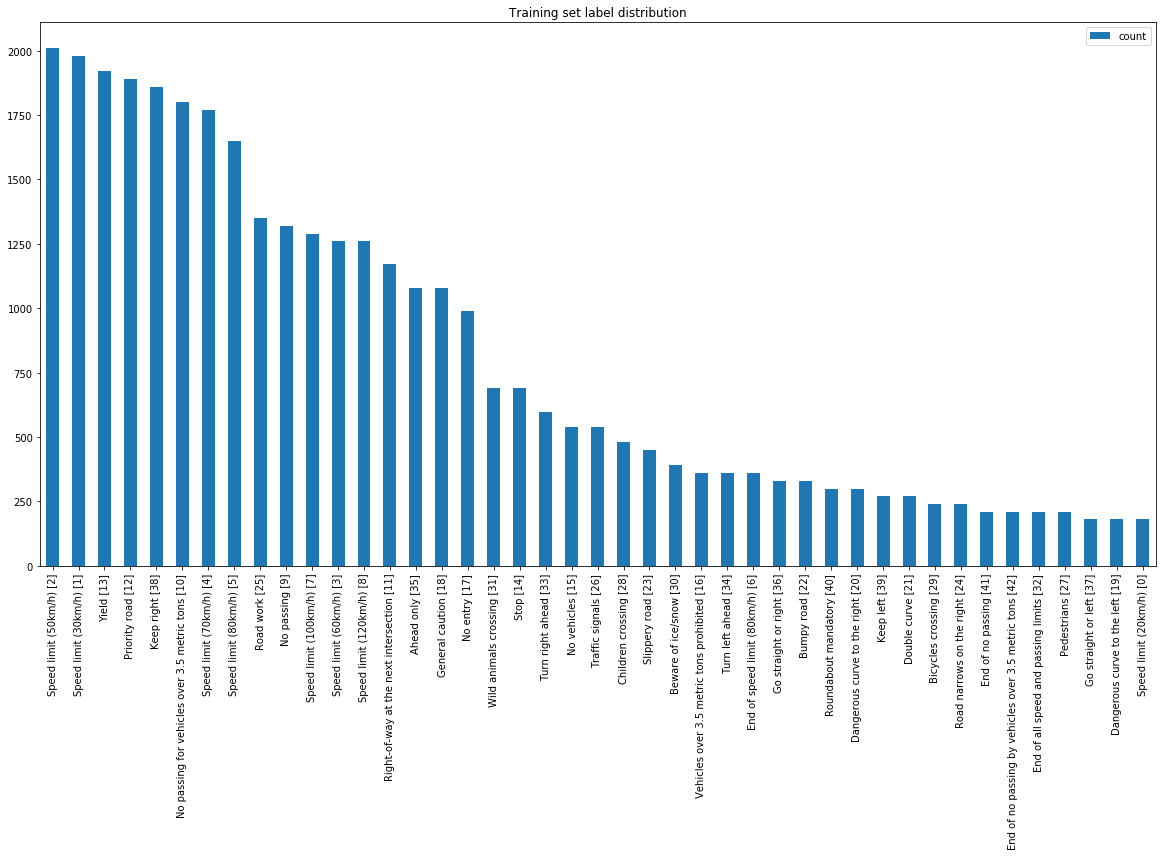

In [12]:
y_train_dist = get_label_distribution(y_train_raw)
fig, ax = plt.subplots()
y_train_dist.plot.bar(figsize=(20,10), xticks=y_train_dist.index, ax=ax)
ax.set_xticklabels(lookup_fn(y_train_dist.index))
ax.set_title('Training set label distribution')
plt.show()

In [13]:
y_valid_dist = get_label_distribution(y_valid_raw)
y_test_dist = get_label_distribution(y_test_raw)

y_dist = functools.reduce(
    lambda left, right: pd.merge(left,right, left_index=True, right_index=True), 
    [y_train_dist, y_valid_dist, y_test_dist])
y_dist.columns = ['n_train', 'n_valid', 'n_test']

In [14]:
y_dist.tail()

,n_train,n_valid,n_test
32,210,30,60
27,210,30,60
37,180,30,60
19,180,30,60
0,180,30,60


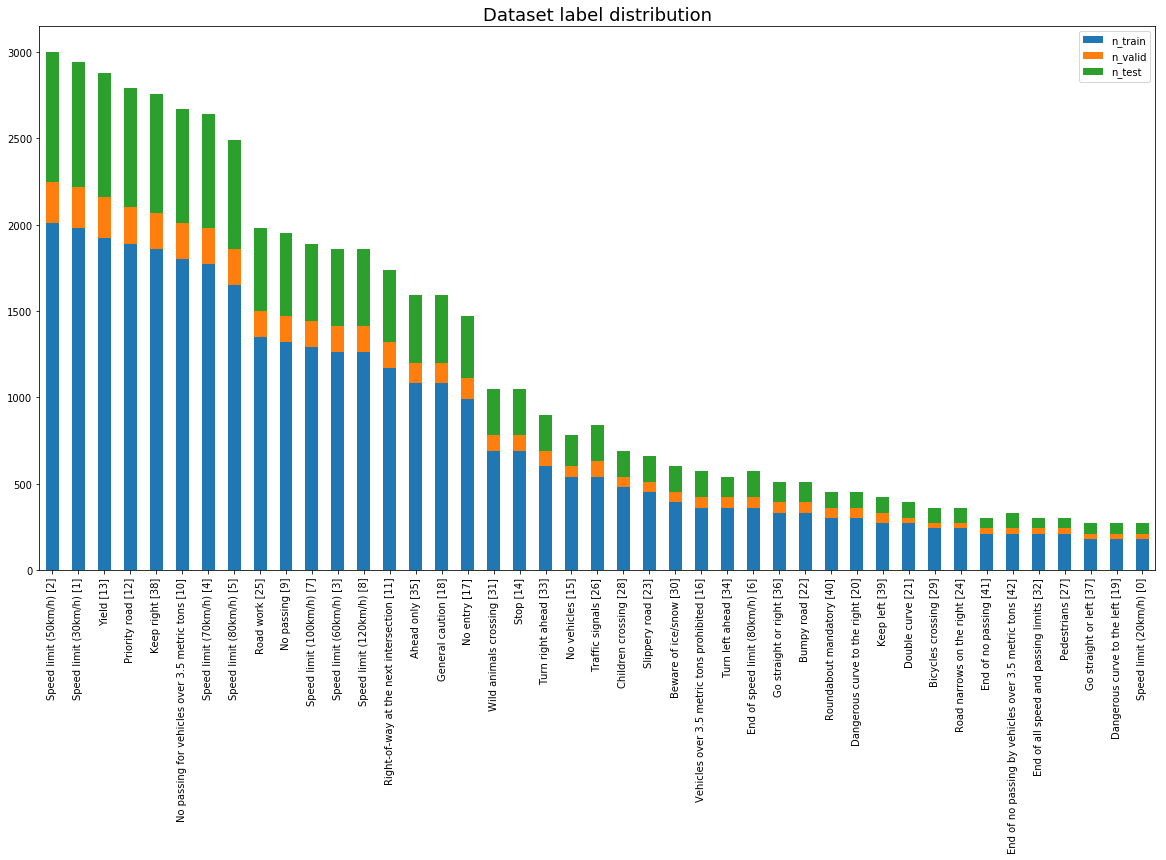

In [15]:
fig, ax = plt.subplots()
(y_dist.sort_values(by='n_train', ascending=False)
 .plot.bar(figsize=(20, 10), xticks=y_train_dist.index, ax=ax, stacked=True))
ax.set_xticklabels(lookup_fn(y_dist.index))
ax.set_title('Dataset label distribution', fontsize=18)
plt.show()

#### Explore images

In [16]:
Image = np.ndarray


def plot_images(images, labels=None, cols=2, figsize=(20, 20), fontsize=12, title=None):
    """Plots multiple images."""

    n = len(images)
    if labels is not None and len(labels) != n:
        raise ValueError(f'Need {n} labels.')
    unbalanced = True if n % cols != 0 else False
    rows = math.ceil(n / cols) if unbalanced else n // cols
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    if unbalanced:
        count = rows*cols - n
    else:
        count = 0
    for i in range(count):
        fig.delaxes(axes[rows - 1, cols - 1 - i])
    
    if labels is None:
        labels = [None]*n
    
    if title:
        plt.suptitle(title, fontsize=fontsize)
    for i, (label, img) in enumerate(zip(labels, images)):
        col = i % cols
        if rows == 1:
            ax = axes[col]
        else:
            row = i // cols
            ax = axes[row, col]
        n_dim = len(img.shape)
        if n_dim == 3 and img.shape[-1] == 1:
            ax.imshow(np.squeeze(img), cmap='gray')
        else:
            ax.imshow(img)
        if label:
            ax.set_title(f'{label}', fontsize=fontsize)
        ax.axis('off')

##### Show a subset of training set images

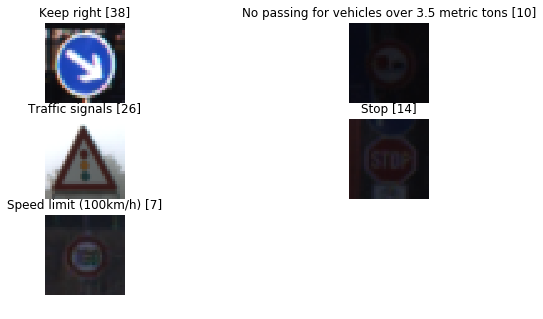

In [17]:
n = 5
indices = list(np.random.choice(n_train, size=n))
class_ids = list(np.take(y_train_raw, indices, axis=0))
labels = lookup_fn(class_ids)
images = list(np.take(X_train_raw, indices, axis=0))
plot_images(images, labels, figsize=(10,5), cols=2, fontsize=12)

##### Show an example of each unique German traffic sign

In [18]:
unique, unique_indices, unique_counts = np.unique(
    y_train_raw, return_index=True, return_counts=True)

In [19]:
unique[38], unique_indices[38]

(38, 14010)

In [20]:
unique_images = np.take(X_train_raw, unique_indices, axis=0)
unique_images.shape

(43, 32, 32, 3)

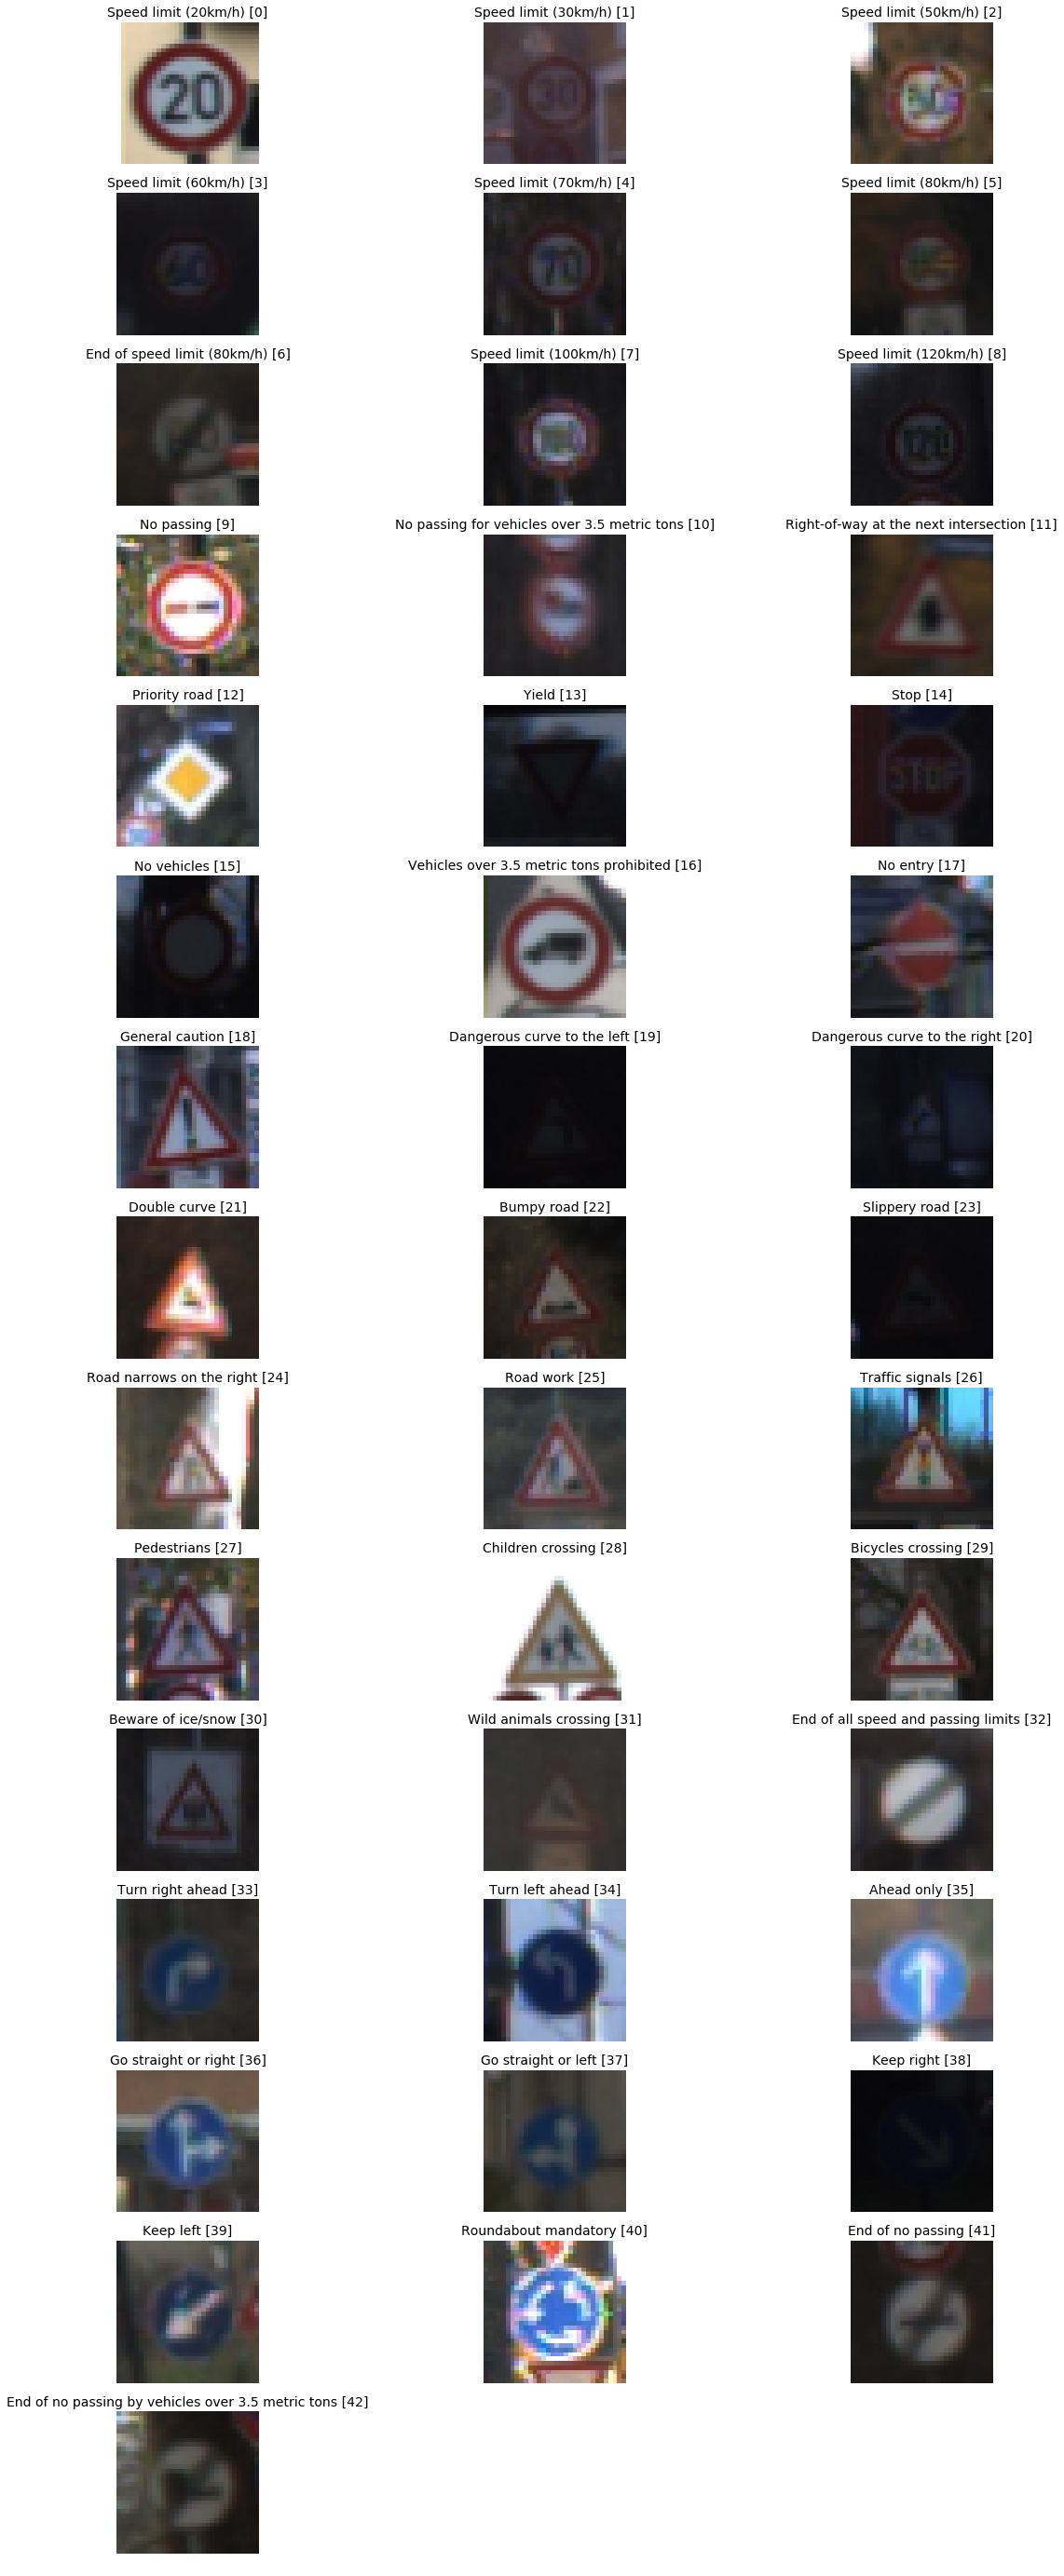

In [21]:
plot_images(unique_images, lookup_fn(unique), figsize=(20, 50), cols=3, fontsize=14)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [22]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#### Convert images to grayscale

In [23]:
def rgb2gray(img):
    """Convert image to grayscale.
    
    Uses matrix multiplication with Luma transform coefficients.
    See:
    https://pillow.readthedocs.io/en/3.2.x/reference/Image.html#PIL.Image.Image.convert
    """
    return np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])


def grayscale(images):
    """Converts a batch of images to grayscale."""
    gray_list = []
    for img in images:
        gray = rgb2gray(img)
        gray_list.append(gray)
    
    return np.expand_dims(np.stack(gray_list, axis=0), -1)

In [24]:
X_train_g = grayscale(X_train_raw)
X_valid_g = grayscale(X_valid_raw)
X_test_g = grayscale(X_test_raw)

print(X_train_g.shape, X_valid_g.shape, X_test_g.shape)

(34799, 32, 32, 1) (4410, 32, 32, 1) (12630, 32, 32, 1)


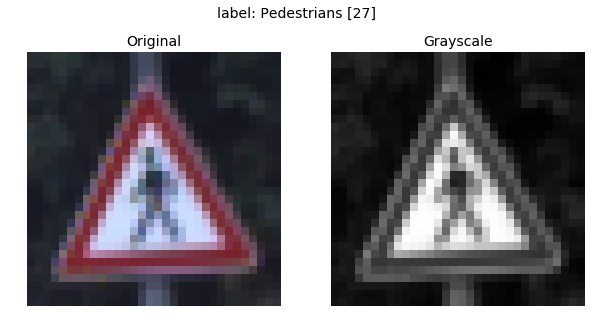

In [25]:
sample_idx = 10428
sample_class_id = y_train_raw[sample_idx]
sample_label = lookup_fn(sample_class_id)
plot_images(
    [X_train_raw[sample_idx], X_train_g[sample_idx]],
    labels=['Original', 'Grayscale'],
    figsize=(10, 5),
    title=f'label: {sample_label}',
    fontsize=14,
)

#### Normalize grayscale images

In [26]:
def normalize(images):
    """Normalizes a batch of images using per-image standardization."""
    
    # Per-image standardization
    old_shape = images.shape
    images_flat = images.reshape(-1, np.prod(images.shape[1:]))
    image_mean = np.mean(images_flat, axis=1).reshape((-1, 1))
    image_std = np.std(images_flat, axis=1).reshape((-1, 1))
    normalized = (images_flat - image_mean)  / image_std
    return normalized.reshape(old_shape)

In [27]:
X_train = normalize(X_train_g)
X_valid = normalize(X_valid_g)
X_test = normalize(X_test_g)

print(X_train.shape, X_valid.shape, X_test.shape)

for X in [X_train[0], X_valid[0], X_test[0]]:
    print(X.min(), X.max(), X.mean())

(34799, 32, 32, 1) (4410, 32, 32, 1) (12630, 32, 32, 1)
-0.889824298551 2.66543676078 2.15105711021e-16
-0.869769308262 2.55209393871 -7.6327832943e-17
-2.13441244465 0.960033475452 -1.45716771982e-16


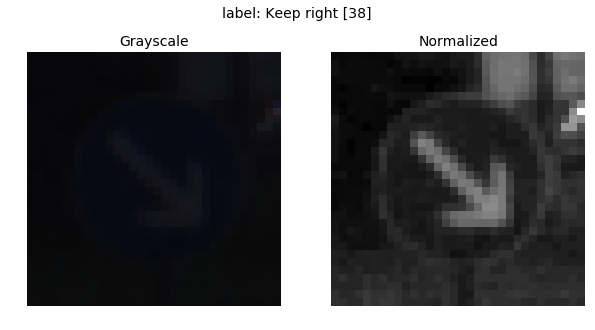

In [28]:
# Show example normalized grayscale image
class_id = 38
img_idx = unique_indices[class_id]
label = str(lookup_fn(class_id))
raw_img = X_train_raw[img_idx]
img = X_train[img_idx]
img = ((img - img.min())*255 / (img.max() - img.min())).astype(np.uint8)
plot_images(
    [raw_img, img], 
    labels=['Grayscale', 'Normalized'], 
    fontsize=14, 
    figsize=(10,5),
    title=f'label: {label}',
)

In [29]:
y_train = y_train_raw
y_valid = y_valid_raw
y_test = y_test_raw

#### Shuffle training set

In [30]:
X_train, y_train = utils.shuffle(X_train, y_train)

### Model Architecture

In [31]:
tf.reset_default_graph()

In [32]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

g_layers = {}

def get_random_variable(shape, mu=0, sigma=1, name=None):

    if name:
        if mu == 0 and sigma == 0:
            initializer = tf.zeros_initializer()
        else:
            initializer = tf.random_normal_initializer(mean=mu, stddev=sigma)
        v = tf.get_variable(name, shape, initializer=initializer)
        return v
    else:
        if mu == 0 and sigma == 0:
            x = tf.zeros(shape)
        else:
            x = tf.truncated_normal(shape, mean=mu, stddev=sigma)
        return tf.Variable(x)


def conv2d(x, filters, kernel_size, strides=(1, 1), padding='VALID', init_params=(0, 1), name=None):
    if isinstance(kernel_size, int):
        kernel_size = (kernel_size, kernel_size)
    shape = list(kernel_size)
    shape.append(int(x.shape[-1]))
    shape.append(filters)
    assert len(shape) == 4
    
    mu, sigma = init_params
    weights_name = name + '_W' if name else None
    biases_name = name + '_b' if name else None
    weights = get_random_variable(shape, mu, sigma, weights_name)
    biases = get_random_variable(filters, 0, 0, biases_name)
    
    if isinstance(strides, int):
        strides = (strides, strides)
    strides = [1] + list(strides) + [1]
    assert len(strides) == 4
    
    output = tf.nn.conv2d(x, weights, strides, padding) + biases
    if name:
        g_layers[name] = output
    return output


def maxpool2d(x, pool_size, strides=(1,1), padding='VALID'):
    if isinstance(pool_size, int):
        pool_size = (pool_size, pool_size)
    kernel_size = [1] + list(pool_size) + [1]
    
    if isinstance(strides, int):
        strides = (strides, strides)
    strides = [1] + list(strides) + [1]
    
    return tf.nn.max_pool(x, kernel_size, strides, padding)


def dense(x, units, init_params=(0, 1), name=None):
    n_features = int(x.shape[-1])
    mu, sigma = init_params
    weights_name = name + '_W' if name else None
    biases_name = name + '_b' if name else None 
    weights = get_random_variable((n_features, units), mu, sigma, weights_name)
    biases = get_random_variable((units,), 0, 0, biases_name)
    output = tf.add(tf.matmul(x, weights), biases)
    if name:
        g_layers[name] = output
    return output


def flatten(x):
    #n = int(np.prod(x.shape[1:]))
    #return tf.reshape(x, (-1, n))
    return tf.contrib.layers.flatten(x)


def LeNet(x, n_classes, dropout_prob):
    # Mean and standard deviation for variable initialization
    mu = 0
    sigma = 0.1
    
    conv2d_fn = functools.partial(conv2d, init_params=(mu, sigma))
    dense_fn = functools.partial(dense, init_params=(mu, sigma))
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    c1 = conv2d_fn(x, filters=6, kernel_size=5, name='c1')
    assert c1.shape[1:] == (28, 28, 6)

    # Activation.
    relu1 = tf.nn.relu(c1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = maxpool2d(relu1, pool_size=2, strides=2)

    # Layer 2: Convolutional. Output = 10x10x16.
    c2 = conv2d_fn(pool1, filters=16, kernel_size=5, name='c2')
    
    # Activation.
    relu2 = tf.nn.relu(c2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = maxpool2d(relu2, pool_size=2, strides=2)
    g_layers['pool2'] = pool2

    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(pool2)
    
    # Dropout
    dropout = tf.nn.dropout(flat, keep_prob=dropout_prob)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = dense_fn(dropout, 120, name='fc1')
    
    # Activation.
    relu3 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = dense_fn(relu3, 84, name='fc2')
    
    # Activation.
    relu4 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = dense_fn(relu4, n_classes, name='logits')
    
    return logits

In [33]:
# Sanity check `conv2d` function

x = np.array([
    [0, 1, 0.5, 10],
    [2, 2.5, 1, -8],
    [4, 0, 5, 6],
    [15, 1, 2, 3]], dtype=np.float32).reshape((1, 4, 4, 1))
X = tf.constant(x)

output = conv2d(X, 3, kernel_size=2, strides=2, padding='SAME')
assert output.shape == (1, 2, 2, 3)

In [34]:
# Sanity check `maxpool2d` function

x = np.array([
    [0, 1, 0.5, 10],
    [2, 2.5, 1, -8],
    [4, 0, 5, 6],
    [15, 1, 2, 3]], dtype=np.float32).reshape((1, 4, 4, 1))
X = tf.constant(x)
output = maxpool2d(X, pool_size=2, strides=2)
assert output.shape == (1, 2, 2, 1)

In [35]:
# Sanity check `flatten` function
x = np.array([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
])
X = tf.constant(x)
output = flatten(X)
assert output.shape == (2, 4)

In [36]:
# Sanity check `dense` function

x = np.random.rand(32, 400).astype(np.float32)
X = tf.constant(x)
output = dense(X, 120)
assert output.shape == (32, 120)

In [37]:
# Sanity check `LeNet` function

dropout_prob = tf.constant(0.5)
x_batch = tf.constant(X_train[0:2], dtype=tf.float32)
y_batch = LeNet(x_batch, n_classes, dropout_prob)
assert y_batch.shape == (2, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [38]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#### Hyperparameters

In [39]:
learning_rate = 0.001
batch_size = 128
num_epochs = 15
dropout_keep_prob = 0.5

#### Training operation

In [40]:
tf.reset_default_graph()

In [41]:
preprocessed_image_shape = X_train[0].shape
x = tf.placeholder(tf.float32, (None,) + preprocessed_image_shape)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
dropout_prob = tf.placeholder(tf.float32)

# NOTE: set `reuse=True` if re-running this cell without resetting the graph
reuse = False
with tf.variable_scope('params', reuse=reuse):
    logits = LeNet(x, n_classes, dropout_prob)


with tf.variable_scope('params', reuse=reuse):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_op = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss_op)

#### Evaluation operation 

In [42]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = (
            X_data[offset: offset + batch_size], 
            y_data[offset: offset + batch_size])
        accuracy = sess.run(
            accuracy_op, feed_dict={x: batch_x, y: batch_y, dropout_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Training and evaluation

In [165]:
def timestamp():
    now = datetime.now()
    return now.strftime("%Y%m%d_%H%M%S")

In [166]:
%time
saver = tf.train.Saver()
model_name = f'lenet_{timestamp()}'
model_prefix = f'./models/{model_name}/{model_name}'

results = collections.defaultdict(list)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    t = tqdm.trange(num_epochs, desc='Bar desc', leave=True)
    for i in t:
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(
                training_op, 
                feed_dict={x: batch_x, y: batch_y, dropout_prob: dropout_keep_prob})
        
        training_accuracy = evaluate(X_train, y_train, batch_size)
        validation_accuracy = evaluate(X_valid, y_valid, batch_size)
        results['train_acc'].append(training_accuracy)
        results['valid_acc'].append(validation_accuracy)
        t.set_description(f'Epoch {i + 1}: train_acc={training_accuracy}, valid_acc={validation_accuracy}')

    saver.save(sess, model_prefix)
    print(f'Model saved as {model_prefix}.*')


Bar desc:   0%|          | 0/15 [00:00<?, ?it/s]
Epoch 1: train_acc=0.8818931578476507, valid_acc=0.8081632650628382:   7%|▋         | 1/15 [00:02<00:35,  2.56s/it]
Epoch 15: train_acc=0.9950285927756545, valid_acc=0.954421768707483: 100%|██████████| 15/15 [00:36<00:00,  2.39s/it] 

Model saved as ./models/lenet_20200831_184540/lenet_20200831_184540.*


#### Analysis

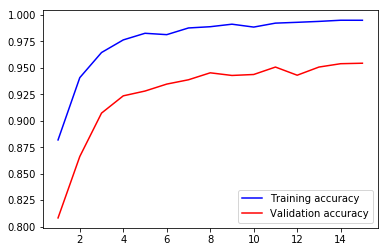

In [167]:
epochs = list(range(1, num_epochs + 1))
fig, ax = plt.subplots()
ax.plot(epochs, results['train_acc'], '-b', label='Training accuracy')
ax.plot(epochs, results['valid_acc'], '-r', label='Validation accuracy')
ax.legend()
plt.show()

In [230]:
# Print performance summary as spreadsheet row
final_train_acc_ = f'{final_train_acc:0.3f}'
final_valid_acc_ = f'{final_valid_acc:0.3f}'
row = [model_file, learning_rate, batch_size, num_epochs, dropout_keep_prob, final_train_acc_, final_valid_acc_]
print('\t'.join([str(x) for x in row]))

./lenet_20200831_180512	0.001	128	15	0.5	0.995	0.945


### Test set performance

In [169]:
# Current final model: ./models/lenet_20200831_184540/lenet_20200831_184540
print(f'Loading model from {model_prefix}')
with tf.Session() as sess:
    saver.restore(sess, model_prefix)
    test_accuracy = evaluate(X_test, y_test, batch_size)
    print("Accuracy = {:.3f}".format(test_accuracy))

Loading model from ./models/lenet_20200831_184540/lenet_20200831_184540
INFO:tensorflow:Restoring parameters from ./models/lenet_20200831_184540/lenet_20200831_184540
Accuracy = 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
new_file = os.path.join(data_dir, 'new.p')

with open(new_file, mode='rb') as f:
    new = pickle.load(f)
    
X_new_raw, y_new_raw = new['features'], new['labels']

In [52]:
print(X_new_raw.shape, y_new_raw)

(5, 32, 32, 3) [37, 39, 1, 4, 14]


In [53]:
new_labels = [f'{lookup[id_]} [{id_}]' for id_ in y_new_raw]
new_labels

['Go straight or left [37]',
 'Keep left [39]',
 'Speed limit (30km/h) [1]',
 'Speed limit (70km/h) [4]',
 'Stop [14]']

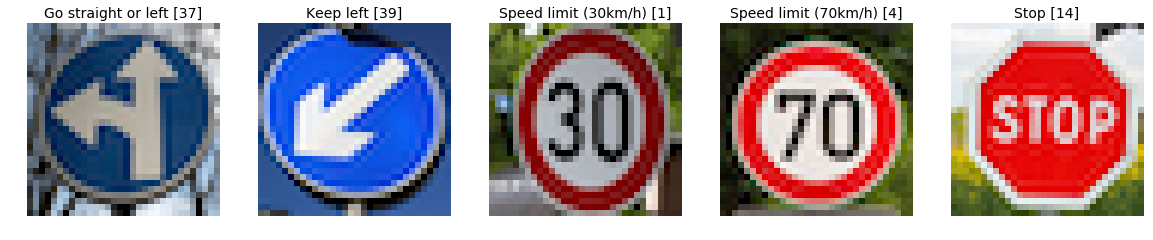

In [54]:
plot_images(X_new_raw, new_labels, cols=len(new_labels), fontsize=14)

### Predict the Sign Type for Each Image

In [55]:
# Preprocess data
X_new = normalize(grayscale(X_new_raw))
print(X_new.shape, X_new.min(), X_new.max(), X_new.mean())

y_new = np.array(y_new_raw)

(5, 32, 32, 1) -2.02287101936 2.74223419633 -5.55111512313e-18


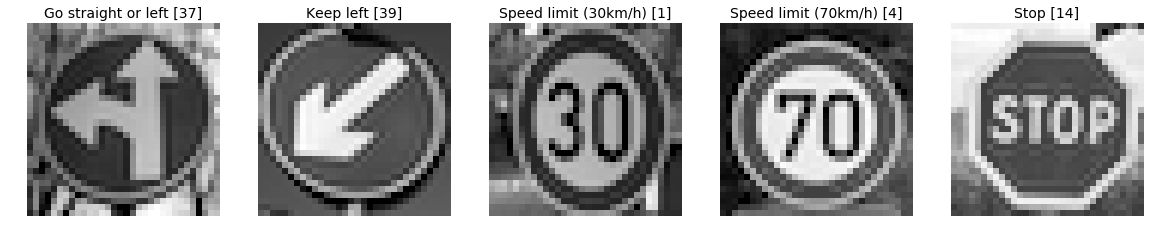

In [56]:
plot_images(X_new, new_labels, cols=len(new_labels), fontsize=14)

In [57]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [58]:
batch_size = len(X_new)

predict_proba = tf.nn.softmax(logits)
saver = tf.train.Saver()

print(f'Loading model from {model_prefix}')

with tf.Session() as sess:
    saver.restore(sess, model_prefix)
    y_proba = sess.run(predict_proba, feed_dict={x: X_new, dropout_prob: 1})

Loading model from ./models/lenet_20200831_184540/lenet_20200831_184540
INFO:tensorflow:Restoring parameters from ./models/lenet_20200831_184540/lenet_20200831_184540


In [59]:
y_pred = np.argmax(y_proba, axis=1)

### Analyze Performance

In [60]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [61]:
accuracy = sum((y_pred == y_new).astype(np.int8))/len(y_new)
print(f'accuracy = {accuracy:.3f}')

accuracy = 0.800


In [62]:
results = pd.DataFrame(dict(
    y_true=y_new, 
    y_pred=y_pred,
    pred_prob=np.max(y_proba, axis=1),
    y_true_label=lookup_fn(y_new),
    y_pred_label=lookup_fn(y_pred),
    is_correct=(y_new == y_pred),
))
results

,y_true,y_pred,pred_prob,y_true_label,y_pred_label,is_correct
0,37,38,0.930413,Go straight or left [37],Keep right [38],False
1,39,39,0.970996,Keep left [39],Keep left [39],True
2,1,1,0.999999,Speed limit (30km/h) [1],Speed limit (30km/h) [1],True
3,4,4,0.961276,Speed limit (70km/h) [4],Speed limit (70km/h) [4],True
4,14,14,0.999889,Stop [14],Stop [14],True


In [63]:
y_train_raw_df = pd.DataFrame(y_train_raw, columns=['class_id'])

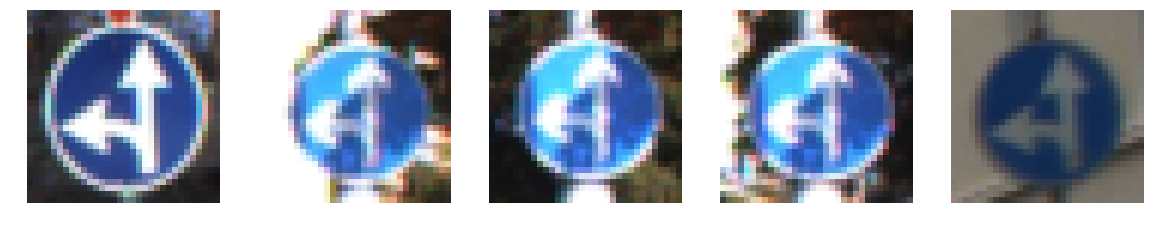

In [64]:
sample37_indices = y_train_raw_df[y_train_raw_df.class_id == 37].sample(5).index
sample37 = np.take(X_train_raw, sample37_indices, axis=0)
plot_images(sample37, cols=5)

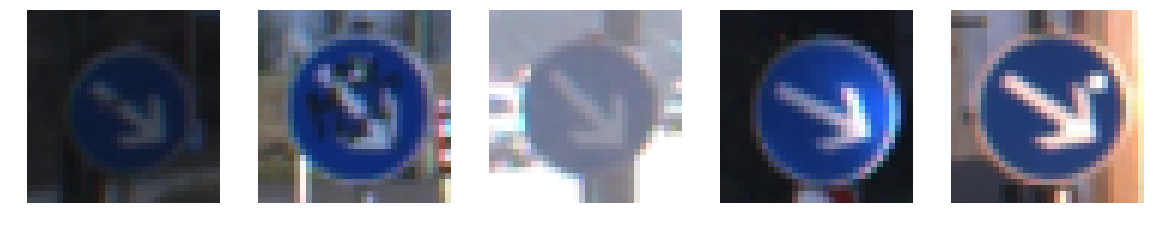

In [65]:
sample38_indices = y_train_raw_df[y_train_raw_df.class_id == 38].sample(5).index
sample38 = np.take(X_train_raw, sample38_indices, axis=0)
plot_images(sample38, cols=5)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [66]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top5_op = tf.nn.top_k(y_proba, k=5)
with tf.Session() as sess:
    top5 = sess.run(top5_op)
    
top5

TopKV2(values=array([[  9.30412889e-01,   6.16948791e-02,   5.67186764e-03,
          9.65125393e-04,   4.21058445e-04],
       [  9.70995963e-01,   1.11017982e-02,   8.03620461e-03,
          4.85985959e-03,   1.79695513e-03],
       [  9.99998689e-01,   1.26577163e-06,   3.35818373e-10,
          7.52043983e-11,   1.68267136e-11],
       [  9.61276054e-01,   3.66891213e-02,   2.03368161e-03,
          9.26441942e-07,   1.49278648e-07],
       [  9.99888778e-01,   7.91150524e-05,   2.46246709e-05,
          5.44069053e-06,   6.68505436e-07]], dtype=float32), indices=array([[38, 26, 40, 12, 14],
       [39, 37, 28, 21, 31],
       [ 1,  0,  4, 40,  2],
       [ 4,  0,  1,  5,  6],
       [14,  3, 34, 17, 38]], dtype=int32))

##### Summarize top-5 softmax probabilities

In [67]:
top5_labels = lookup_fn(top5.indices)
top5_labels_values = np.dstack((top5_labels, top5.values))
top5_table = np.apply_along_axis(
    lambda x: np.array(f'{x[0]} ({float(x[1]):.4f})', dtype='<U100'), 
    axis=-1, arr=top5_labels_values)
top5_dict = {'y_true_label': list(lookup_fn(y_new))}
top5_dict.update({k: v for k, v in zip(
    ['1st', '2nd', '3rd', '4th', '5th'], 
    np.squeeze(np.split(top5_table, 5, axis=1))
)})
top5_df = pd.DataFrame.from_dict(top5_dict, orient='columns')
top5_df.head()

,y_true_label,1st,2nd,3rd,4th,5th
0,Go straight or left [37],Keep right [38] (0.9304),Traffic signals [26] (0.0617),Roundabout mandatory [40] (0.0057),Priority road [12] (0.0010),Stop [14] (0.0004)
1,Keep left [39],Keep left [39] (0.9710),Go straight or left [37] (0.0111),Children crossing [28] (0.0080),Double curve [21] (0.0049),Wild animals crossing [31] (0.0018)
2,Speed limit (30km/h) [1],Speed limit (30km/h) [1] (1.0000),Speed limit (20km/h) [0] (0.0000),Speed limit (70km/h) [4] (0.0000),Roundabout mandatory [40] (0.0000),Speed limit (50km/h) [2] (0.0000)
3,Speed limit (70km/h) [4],Speed limit (70km/h) [4] (0.9613),Speed limit (20km/h) [0] (0.0367),Speed limit (30km/h) [1] (0.0020),Speed limit (80km/h) [5] (0.0000),End of speed limit (80km/h) [6] (0.0000)
4,Stop [14],Stop [14] (0.9999),Speed limit (60km/h) [3] (0.0001),Turn left ahead [34] (0.0000),No entry [17] (0.0000),Keep right [38] (0.0000)


##### More visual way

In [16]:
top5_table

NameError: name 'top5_table' is not defined

##### Erroneous prediction analysis

In [68]:
error_sample = pd.DataFrame(y_proba[0], columns=['proba'])
error_sample.sort_values(by='proba', ascending=False, inplace=True)
error_sample.reset_index(inplace=True)
error_sample.columns = ['class_id', 'proba']
error_sample.head()

,class_id,proba
0,38,0.930413
1,26,0.061695
2,40,0.005672
3,12,0.000965
4,14,0.000421


In [69]:
# Probability ranking of the correct prediction
error_sample[error_sample.class_id == y_new[0]]

,class_id,proba
7,37,0.0001


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [70]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [71]:
g_layers

{'c1': <tf.Tensor 'params/add:0' shape=(?, 28, 28, 6) dtype=float32>,
 'c2': <tf.Tensor 'params/add_1:0' shape=(?, 10, 10, 16) dtype=float32>,
 'pool2': <tf.Tensor 'params/MaxPool_1:0' shape=(?, 5, 5, 16) dtype=float32>,
 'fc1': <tf.Tensor 'params/Add:0' shape=(?, 120) dtype=float32>,
 'fc2': <tf.Tensor 'params/Add_1:0' shape=(?, 84) dtype=float32>,
 'logits': <tf.Tensor 'params/Add_2:0' shape=(?, 43) dtype=float32>}

In [72]:
try:
    _ = model_prefix
except NameError:
    model_prefix = './models/lenet_20200831_184540/lenet_20200831_184540'
print(f'Using model {model_prefix}')

Using model ./models/lenet_20200831_184540/lenet_20200831_184540


In [73]:
saver = tf.train.Saver()
sess = tf.InteractiveSession()
saver.restore(sess, model_prefix)

INFO:tensorflow:Restoring parameters from ./models/lenet_20200831_184540/lenet_20200831_184540


In [74]:
# Feature map for similar image in the training set
def preprocess(img):
    return normalize(grayscale(img))

error_img = X_new[0]
sample37_prep = preprocess(sample37[-1])
sample38_prep = preprocess(sample38[-1])

#### Conv 1

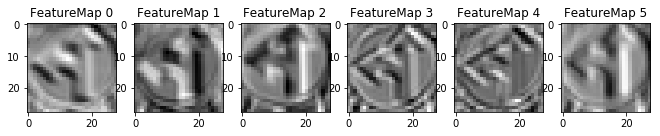

In [75]:
outputFeatureMap(np.expand_dims(error_img, 0), g_layers['c1'])

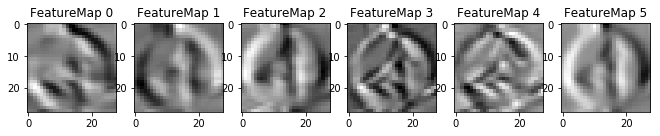

In [76]:
outputFeatureMap(np.expand_dims(sample37_prep, 0), g_layers['c1'])

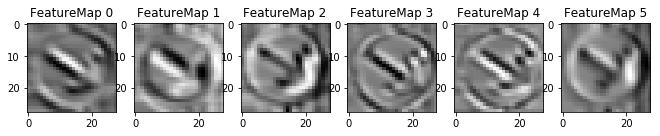

In [77]:
outputFeatureMap(np.expand_dims(sample38_prep, 0), g_layers['c1'])

#### Conv 2

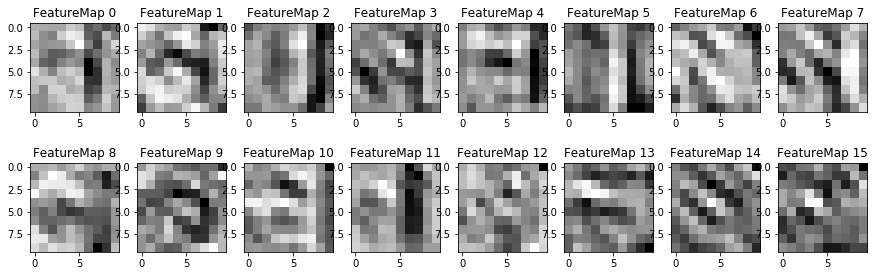

In [78]:
outputFeatureMap(np.expand_dims(error_img, 0), g_layers['c2'])

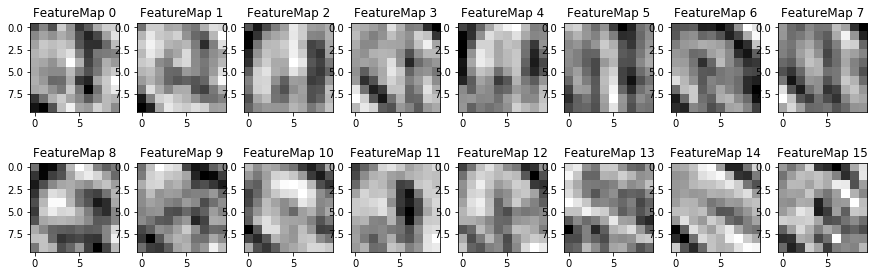

In [79]:
outputFeatureMap(np.expand_dims(sample37_prep, 0), g_layers['c2'])

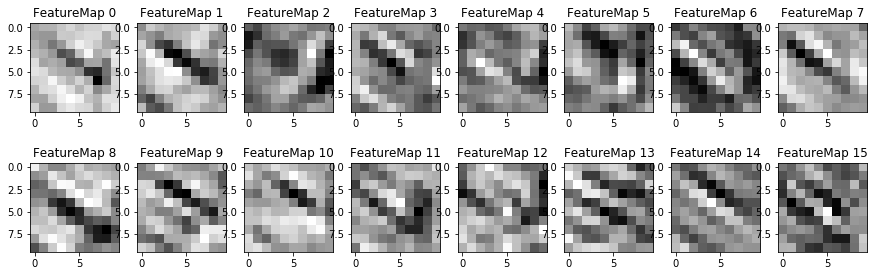

In [80]:
outputFeatureMap(np.expand_dims(sample38_prep, 0), g_layers['c2'])

#### Pool2

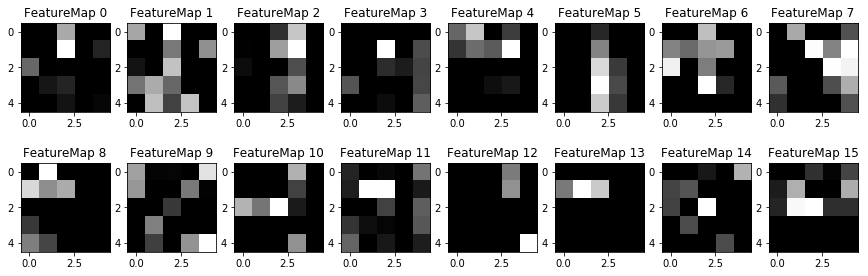

In [83]:
outputFeatureMap(np.expand_dims(error_img, 0), g_layers['pool2'])

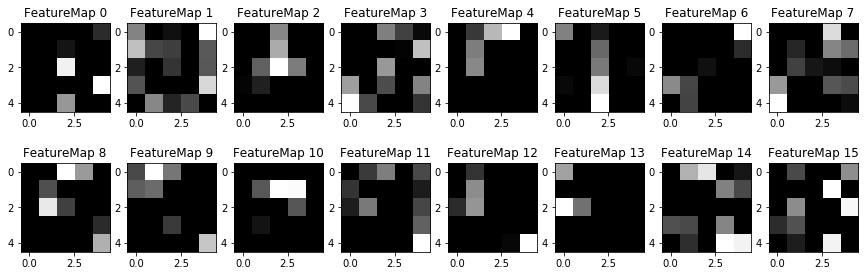

In [84]:
outputFeatureMap(np.expand_dims(sample37_prep, 0), g_layers['pool2'])

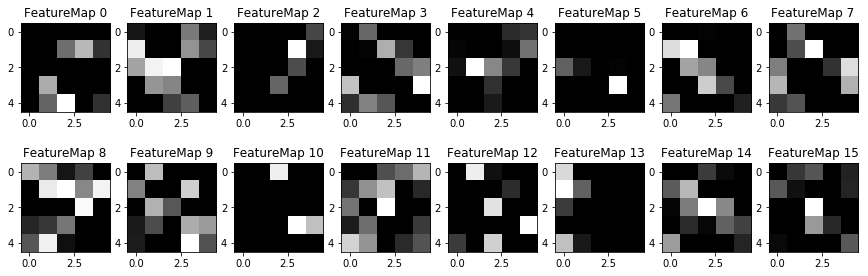

In [85]:
outputFeatureMap(np.expand_dims(sample38_prep, 0), g_layers['pool2'])